In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline
import locale
locale.setlocale( locale.LC_ALL, 'en_CA.UTF-8' )

'en_CA.UTF-8'

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [4]:
list_of_tickers = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data using alpaca api
# try to get adjusted close price
df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.head()

AGG                                         SPY  \
                             open     high      low    close   volume    open   
2019-12-16 00:00:00-05:00  112.68  112.690  112.500  112.580  2645199  319.22   
2019-12-17 00:00:00-05:00  112.69  112.700  112.520  112.595  2268253  319.92   
2019-12-18 00:00:00-05:00  112.55  112.555  112.360  112.380  3556902  320.00   
2019-12-19 00:00:00-05:00  112.19  112.360  112.135  112.290  3869419  319.80   
2019-12-20 00:00:00-05:00  112.21  112.330  112.150  112.310  7562264  320.46   

                                                                 
                             high       low     close    volume  
2019-12-16 00:00:00-05:00  320.15  317.2542  319.5100  60263122  
2019-12-17 00:00:00-05:00  320.25  319.4800  319.5495  45097303  
2019-12-18 00:00:00-05:00  320.25  319.5300  319.5800  39434730  
2019-12-19 00:00:00-05:00  320.98  319.5246  320.9100  61273523  
2019-12-20 00:00:00-05:00  321.45  319.3873  320.9500  89245466

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [11]:
list_of_tickers = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data using alpaca api
df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.head()
#level 2 header WIP. fill all

AGG                                         SPY  \
                             open     high      low    close   volume    open   
2019-12-16 00:00:00-05:00  112.68  112.690  112.500  112.580  2645199  319.22   
2019-12-17 00:00:00-05:00  112.69  112.700  112.520  112.595  2268253  319.92   
2019-12-18 00:00:00-05:00  112.55  112.555  112.360  112.380  3556902  320.00   
2019-12-19 00:00:00-05:00  112.19  112.360  112.135  112.290  3869419  319.80   
2019-12-20 00:00:00-05:00  112.21  112.330  112.150  112.310  7562264  320.46   

                                                                 
                             high       low     close    volume  
2019-12-16 00:00:00-05:00  320.15  317.2542  319.5100  60263122  
2019-12-17 00:00:00-05:00  320.25  319.4800  319.5495  45097303  
2019-12-18 00:00:00-05:00  320.25  319.5300  319.5800  39434730  
2019-12-19 00:00:00-05:00  320.98  319.5246  320.9100  61273523  
2019-12-20 00:00:00-05:00  321.45  319.3873  320.9500  89245466

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [12]:
# Calculate the daily roi for the stocks
#Data Load
# Drop Outer Table Level
df = df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
# df = df.droplevel(axis=1, level=0)
# Since this is daily data, we can keep only the date (remove the time) component of the data
df.index = df.index.date

columns=["AGG","SPY"]
df.columns=columns

historic_close=df
# historic_close.head()

df_roi=historic_close.pct_change()
df_roi.head()


,AGG,SPY
2019-12-16,NaN,NaN
2019-12-17,0.000133,0.000124
2019-12-18,-0.001909,0.000095
2019-12-19,-0.000801,0.004162
2019-12-20,0.000178,0.000125


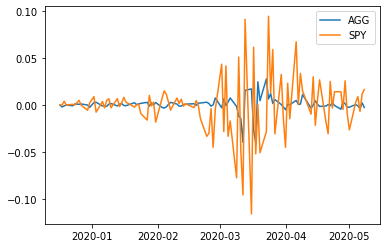

In [13]:
df_roi.plot()

In [41]:
## Calculate volatility
#Average historic returns
avg_daily_return_AGG = df_roi.mean()['AGG']
avg_daily_return_SPY = df_roi.mean()['SPY']
std_dev_daily_return_AGG = df_roi.std()['AGG']
std_dev_daily_return_SPY = df_roi.std()['SPY']

print(f'The standard deviation for AGG is:{std_dev_daily_return_AGG}')
print(f'The standard deviation for SPY is:{std_dev_daily_return_SPY}')

The standard deviation for AGG is:0.008486380070068245
The standard deviation for SPY is:0.030902726500259218


In [42]:
# Save the last day's closing price
agg_last_price = historic_close['AGG'][-1]
spy_last_price = historic_close['SPY'][-1]
print(f'Last closing price for for AGG is:{locale.currency(agg_last_price)}')
print(f'Last closing price for for SPY is:{locale.currency(spy_last_price)}')

Last closing price for for AGG is:$116.73
Last closing price for for SPY is:$287.70


In [43]:
# Setup the Monte Carlo Parameters
#number of simulations X n # of days
number_simulations = 500 # columns
number_records = 252 * 30 # rows
monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()

In [44]:
# Run the Monte Carlo Simulation

# set # of simulations with defined variables
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price as PV.
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 * i days variable predefined.
    #Using normal distribution on random
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_AGG, std_dev_daily_return_AGG))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_SPY, std_dev_daily_return_SPY))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
        
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]
    
     # Use the `dot` Numpy function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    #columns header WIP
    monte_carlo[f"Simulation{n}"] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print head of DataFrame
monte_carlo.head()

,Simulation0,Simulation1,Simulation2,Simulation3,Simulation4,Simulation5,Simulation6,Simulation7,Simulation8,Simulation9,...,Simulation490,Simulation491,Simulation492,Simulation493,Simulation494,Simulation495,Simulation496,Simulation497,Simulation498,Simulation499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998968,0.999068,0.992195,1.018326,1.043722,0.975268,0.986367,1.049381,1.000500,0.978762,...,1.005236,0.968165,1.004289,1.007579,0.983061,1.009572,1.003427,1.023761,0.989882,0.976315
2,1.029221,1.012596,1.007997,0.980561,1.031627,0.971406,0.971474,1.021201,0.994980,0.966938,...,1.016921,0.972398,1.007375,1.018552,0.984068,0.961274,1.004896,1.015149,0.978977,0.989403
3,1.023777,1.007719,1.005794,0.983451,1.021216,0.943215,0.984158,0.994677,0.992043,0.995917,...,1.017949,0.946121,1.007656,1.033084,0.964747,0.968657,1.023785,0.987279,0.985910,1.003879
4,1.043675,1.014089,1.021423,0.997779,1.041874,0.952778,1.000729,0.968653,0.996378,1.011449,...,1.004691,0.957188,1.007041,1.005337,0.967950,0.963143,1.010414,0.996477,0.976484,1.004002


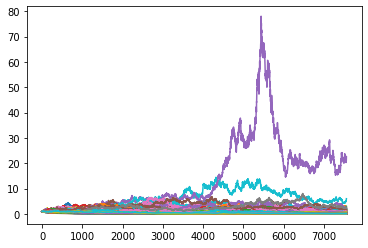

In [45]:
# Visualize the Simulation
monte_carlo.plot(legend=None,);

In [64]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = monte_carlo.iloc[-1, :]
ending_cumulative_returns.head()

0    0.125370
1    0.195310
2    0.232429
3    0.706620
4    0.122965
Name: 7560, dtype: float64

In [65]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
#20 yrs hardcoded for now
ending_cumulative_returns = monte_carlo.iloc[-2520, :]
ending_cumulative_returns.head()

0    0.624795
1    0.074677
2    0.561163
3    0.261969
4    0.677228
Name: 5041, dtype: float64

In [66]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.027793
0.95    1.784260
Name: 5041, dtype: float64

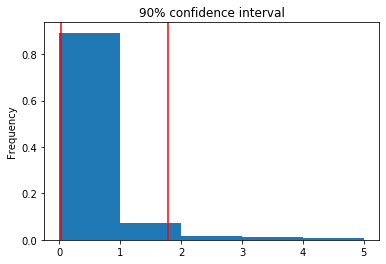

In [67]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=[0,1,2,3,4,5],title="90% confidence interval")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [68]:
# confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
print(f'Expected cumulative return at yr 30 for 10th percentile is: {confidence_interval.iloc[0]}')
print(f'Expected cumulative return at yr 30 for 10th percentile is: {ending_cumulative_returns.median()}')
print(f'Expected cumulative return at yr 30 for 90th percentile is: {confidence_interval.iloc[1]}')


Expected cumulative return at yr 30 for 10th percentile is: 0.02779335190234906
Expected cumulative return at yr 30 for 10th percentile is: 0.21580133055241146
Expected cumulative return at yr 30 for 90th percentile is: 1.784259655077452


In [96]:
confidence_interval.iloc[1]

1.784259655077452

In [ ]:
ending_cumulative_returns.median()

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [110]:
initial_investment = 20000

# Calculate cumulative profit/loss of lower and upper bound
#weights are hardcoaded for now
cumulative_pnl_lower_bound = initial_investment *     ((confidence_interval.iloc[0] - 1)/1) #(.4*agg_last_price+.6*spy_last_price)) / (.4*agg_last_price+.6*spy_last_price))
cumulative_pnl_mid_bound = initial_investment *     (((confidence_interval.iloc[1] -confidence_interval.iloc[0]) - 1)/1) #(.4*agg_last_price+.6*spy_last_price)) / (.4*agg_last_price+.6*spy_last_price))
cumulative_pnl_upper_bound = initial_investment *     ((confidence_interval.iloc[1] - 1)/1) #(.4*agg_last_price+.6*spy_last_price)) / (.4*agg_last_price+.6*spy_last_price))

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_mid_bound = initial_investment + cumulative_pnl_mid_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound
print(locale.currency(ending_investment_lower_bound,grouping=True))
print(locale.currency(ending_investment_mid_bound,grouping=True))
print(locale.currency(ending_investment_upper_bound,grouping=True))
# Print the results
print(f"There is a 90% chance that an initial investment of $20,000 in this portfolio"
      f" over the next 30 trading years will end within in the range of"
      f" {locale.currency(ending_investment_lower_bound,grouping=True)} for the 10th percentile, {locale.currency(ending_investment_mid_bound,grouping=True)} for the 50th percentile, and {locale.currency(ending_investment_upper_bound,grouping=True)} for the 90th percentile")

$555.87
$35,129.33
$35,685.19
There is a 90% chance that an initial investment of $20,000 in this portfolio over the next 30 trading years will end within in the range of $555.87 for the 10th percentile, $35,129.33 for the 50th percentile, and $35,685.19 for the 90th percentile


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [103]:
#projected annual income before taxes =$7,389?
.04 * (initial_investment * ending_cumulative_returns.quantile(.1))


35.49989544522024

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE